### Simple data overview:

In [2]:
#import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the csv.
df=pd.read_csv('googleplaystore.csv',na_values='nan')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Data preprocessing and cleaning:

In [8]:
df['Rating'].nlargest(5)

10472    19.0
329       5.0
612       5.0
615       5.0
633       5.0
Name: Rating, dtype: float64

In [9]:
#locating the row with the maximum value in column "Rating".
loc=df['Rating'].idxmax()
df.loc[loc]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [10]:
#values in category is set to float (to match the rating), then shifted the whole row one column ahead to fix the values.
df.loc[loc,'Category']=float(df['Category'].loc[loc])
df.loc[loc]=df.loc[loc].shift(1)

In [11]:
df.loc[loc]

App                                                  None
Category          Life Made WI-Fi Touchscreen Photo Frame
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [12]:
#fix the 'app' column in this row.
df.loc[loc,'App']=df.loc[loc,'Category']
df.loc[loc]=df.loc[loc].drop('Category')

In [13]:
#row fixed, NaN values are fixeed later on.
df.loc[loc]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [14]:
#Reviews is set to object value, so we change it to float.
df['Reviews']=df['Reviews'].astype(int)

In [15]:
#shape before removing duplicates.
df.shape

(10841, 13)

In [16]:
df.duplicated().sum()

483

In [17]:
#removing obvious duplicates.
df.drop_duplicates(inplace=True)

In [18]:
#removing hidden duplicates (repeated app names).
lst=df.loc[df['App'].str.lower().duplicated()]
df.drop(lst.index,inplace=True)

In [19]:
#shape after removing duplicates.
df.shape

(9639, 13)

In [20]:
#reseting the index after removing duplicated values.
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [21]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Fixing NaN values and outlier handling:

In [23]:
df.isnull().sum()

App                  0
Category             1
Rating            1458
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [24]:
#fix missing values in column "Rating".
df_clean=df.dropna()
df.fillna({'Rating':df_clean['Rating'].median()},inplace=True)

<Axes: ylabel='Rating'>

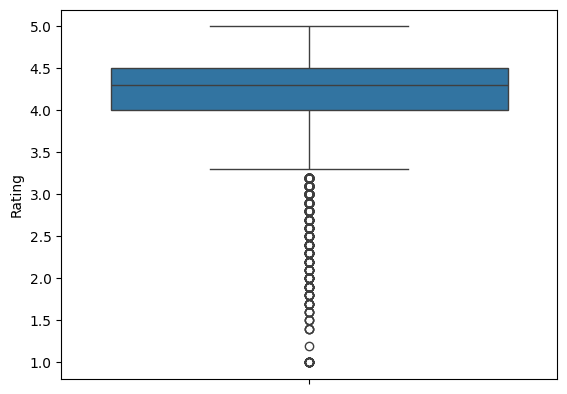

In [25]:
#outlier detection for column 'Rating'
sns.boxplot(df['Rating'])

In [26]:
#dropping ratings that are less than the lower and upper bound.
#mostly lower bound.
#as most of the data is highly rated apps.
Q1=df['Rating'].quantile(0.25)
Q3=df['Rating'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['Rating']>=lower_bound) & (df['Rating']<=upper_bound)]

In [27]:
#new shape of data after outlier handling.
df.shape

(9147, 13)

<Axes: ylabel='Rating'>

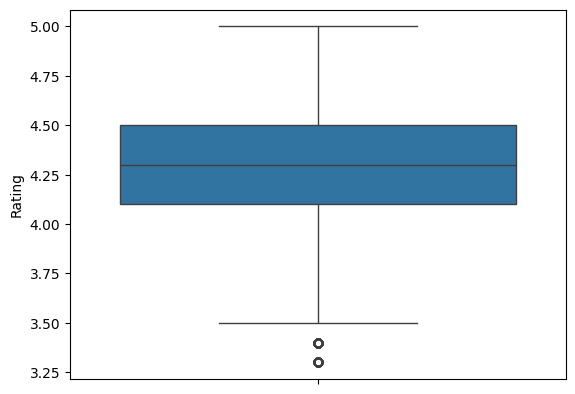

In [28]:
#boxplot after outlier handling.
sns.boxplot(df['Rating'])

In [29]:
#While there is still more outliers in the dataset, it is infactual to change these values as it will give us wrong data.
#also analytical questions require Reviews and Price to be factual and with-scale values.
#but since Rating has garbage values it's okay to drop them.

In [30]:
df.describe()

,Rating,Reviews
count,9147.000000,9.147000e+03
mean,4.274002,2.280545e+05
std,0.339752,1.880516e+06
min,3.300000,0.000000e+00
25%,4.100000,2.600000e+01
50%,4.300000,1.320000e+03
75%,4.500000,3.323250e+04
max,5.000000,7.815831e+07


In [31]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       7
Android Ver       2
dtype: int64

In [32]:
#setting mode of clean Current Ver column.
curr_clean=df[df['Current Ver']!='Varies with device']
modeCV=curr_clean['Current Ver'].mode()[0]
modeCV

'1.0'

In [33]:
#filling na values in Current Ver.
df.fillna({'Current Ver':modeCV},inplace=True)

In [34]:
#setting mode of clean Android Ver column.
modeAV=df_clean['Android Ver'].mode()[0]
modeAV

'4.1 and up'

In [35]:
#filling na values in Android Ver.
df.fillna({'Android Ver':modeAV},inplace=True)

In [36]:
#filling na values in Type.
df.fillna({'Type':df['Type'].mode()[0]}, inplace=True)

In [37]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Cleaning columns and feature engineering:

In [39]:
#check for values in column "Size" that don't end with M or k.
dff_size=df[~df['Size'].str.endswith(('M','k'))]
dff_size['Size'].unique()

array(['Varies with device'], dtype=object)

In [40]:
#new column with values from "Size" as numeric in kilobytes.
df['Size (Kb)']=df['Size'].apply(lambda x: float(x[:-1])*1024 if x[-1]=='M' else(float(x[:-1]) if x[-1]=='k' else(x)) )

In [41]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (Kb)
9634,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,54272.0
9635,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3686.4
9636,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,9728.0
9637,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Varies with device
9638,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,19456.0


In [42]:
#find average in data.
df_clean=df[df['Size (Kb)']!='Varies with device']
meanS=df_clean['Size (Kb)'].mean()

In [43]:
#removing non numeric values.
df.loc[df['Size (Kb)']=='Varies with device','Size (Kb)']=meanS

In [44]:
#recognizing Size (Kb) as float column.
df['Size (Kb)']=df['Size (Kb)'].astype(float)

In [45]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (Kb)
9634,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,54272.000000
9635,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3686.400000
9636,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,9728.000000
9637,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,21189.138428
9638,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,19456.000000


In [46]:
#check for garbage values in column price.
df[~df['Price'].str.startswith(('$','0'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (Kb)


In [47]:
#column "Price in dollars" which is the price column in numeric value.
df['Price in dollars']=df['Price'].apply(lambda x: x[1:] if x[0]=='$' else x)

In [48]:
#recognize the "Price in dollars" column as float value column.
df['Price in dollars']=df['Price in dollars'].astype(float)

In [49]:
#check for unique values in each column. (extra analysis)
for i in df.columns:
    print(f'column {i} has values:{df[i].unique()}\n')

column App has values:['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

column Category has values:['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

column Rating has values:[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5 5. ]

column Reviews has values:[   159    967  87510 ...    603   1195 398307]

column Size has values:['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '

In [50]:
#split the values in category each time _ is encountered.
df['Category']=df['Category'].apply(lambda x: ' '.join(x.split('_')))

In [51]:
df['Category']

0            ART AND DESIGN
1            ART AND DESIGN
2            ART AND DESIGN
3            ART AND DESIGN
4            ART AND DESIGN
               ...         
9634                 FAMILY
9635                 FAMILY
9636                MEDICAL
9637    BOOKS AND REFERENCE
9638              LIFESTYLE
Name: Category, Length: 9147, dtype: object

In [52]:
df['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [53]:
#fix garbage values in Current Ver.
df.loc[df['Current Ver']=='Varies with device','Current Ver']=modeCV

In [54]:
df['Current Ver'].mode()

0    1.0
Name: Current Ver, dtype: object

In [55]:
#fix garbage values in Android Ver.
df.loc[df['Android Ver']=='Varies with device','Android Ver']=modeAV

In [56]:
df['Android Ver'].mode()

0    4.1 and up
Name: Android Ver, dtype: object

In [57]:
#column Installs(+) is the Installs column, but in numeric form.
df['Installs(+)']=df['Installs'].apply(lambda x: int(x.replace(',','').replace('+','')))

In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (Kb),Price in dollars,Installs(+)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0,0.0,10000
1,Coloring book moana,ART AND DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0,0.0,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8,0.0,5000000
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",1.0,4.2 and up,25600.0,0.0,50000000
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2867.2,0.0,100000


In [59]:
df.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         0
Android Ver         0
Size (Kb)           0
Price in dollars    0
Installs(+)         0
dtype: int64

In [60]:
df.describe()

,Rating,Reviews,Size (Kb),Price in dollars,Installs(+)
count,9147.000000,9.147000e+03,9147.000000,9147.000000,9.147000e+03
mean,4.274002,2.280545e+05,21189.138428,0.974846,8.178643e+06
std,0.339752,1.880516e+06,21037.898042,15.269310,5.520201e+07
min,3.300000,0.000000e+00,8.500000,0.000000,0.000000e+00
25%,4.100000,2.600000e+01,5529.600000,0.000000,1.000000e+03
50%,4.300000,1.320000e+03,16384.000000,0.000000,1.000000e+05
75%,4.500000,3.323250e+04,26624.000000,0.000000,1.000000e+06
max,5.000000,7.815831e+07,102400.000000,400.000000,1.000000e+09


### Analytical Questions:

##### 1. What is the most expensive app on the Play Store?

In [63]:
price=df['Price in dollars'].max()
df.loc[df['Price in dollars']==price]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (Kb),Price in dollars,Installs(+)
3467,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,$400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,7475.2,400.0,10000


##### 2. Which genre has the highest number of apps?


In [65]:
#by knowing the most repeated Genre, we can tell which Genre has the most apps.
df['Genres'].mode()[0]

'Tools'

##### 3. What is the average size of free vs. paid apps?

In [67]:
#split the 'Type' column into two dataframes, where each one has a 'Type' value.
paid=df[df['Type']=='Paid']
free=df[df['Type']=='Free']

In [68]:
#calculate the mean value for each dataframe.
print(f'average size of free apps: {free['Size (Kb)'].mean()/1024} Mb , while average size of paid apps: {paid['Size (Kb)'].mean()/1024} Mb')

average size of free apps: 20.790027344493136 Mb , while average size of paid apps: 19.546069167741877 Mb


<Axes: ylabel='Size (Kb)'>

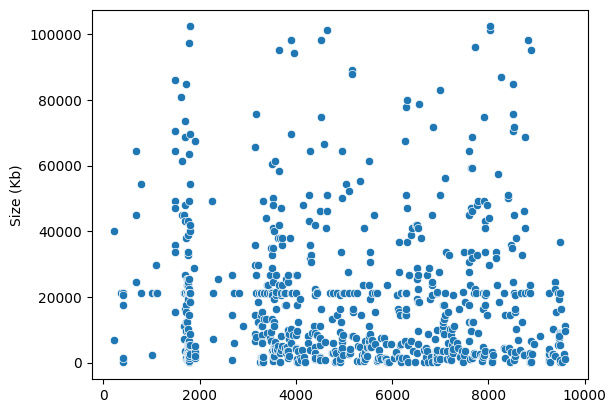

In [69]:
sns.scatterplot(paid['Size (Kb)'])

<Axes: ylabel='Size (Kb)'>

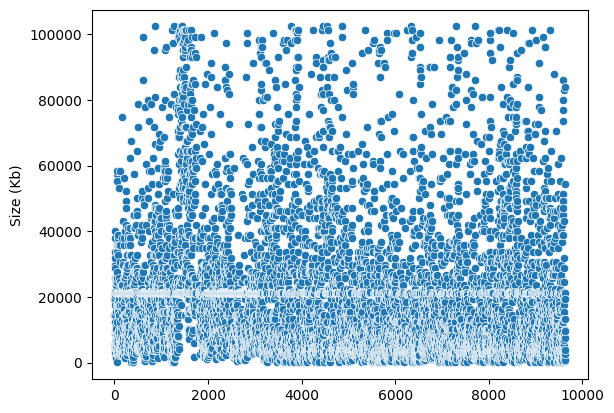

In [70]:
sns.scatterplot(free['Size (Kb)'])

##### 4. What are the top 5 most expensive apps with a perfect rating (5)?


In [72]:
paid5=paid.loc[paid['Rating']==5]

In [73]:
ind=paid5['Price in dollars'].nlargest(5).index
paid5=pd.DataFrame(paid5.loc[ind])
paid5.loc[ind]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (Kb),Price in dollars,Installs(+)
4514,AP Art History Flashcards,FAMILY,5.0,1,96M,10+,Paid,$29.99,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up,98304.0,29.99,10
6412,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40M,10+,Paid,$19.99,Everyone,Education,"May 26, 2014",2.47,2.2 and up,40960.0,19.99,10
4286,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63M,10+,Paid,$4.99,Everyone,Education,"April 4, 2018",1.0.59,2.3 and up,64512.0,4.99,10
4507,meStudying: AP English Lit,FAMILY,5.0,1,655k,10+,Paid,$4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up,655.0,4.99,10
6144,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,27M,100+,Paid,$4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up,27648.0,4.99,100


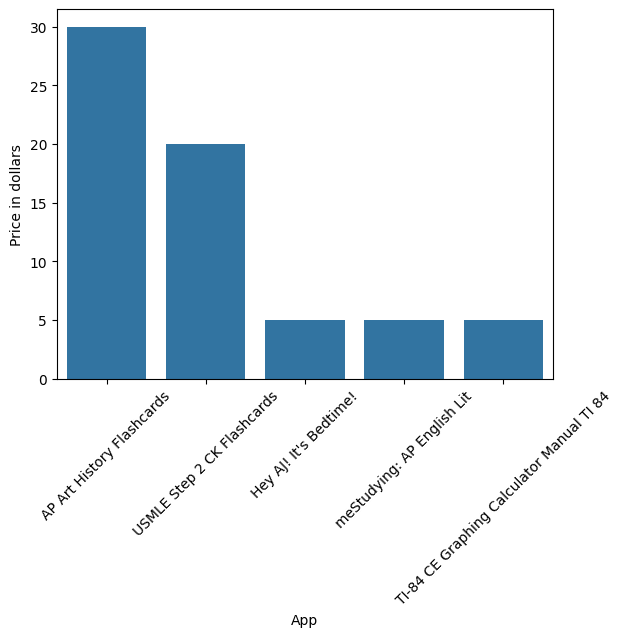

In [74]:
sns.barplot(paid5,x='App',y='Price in dollars')
plt.xticks(rotation=45)
plt.show()

##### 5. How many apps have received more than 50K reviews?

In [76]:
rev=df.loc[df['Reviews']>50000]

In [77]:
rows,_=rev.shape
print(f"There's {rows} apps that have more than 50K reviews.")

There's 1939 apps that have more than 50K reviews.


##### 6. What is the average price of apps, grouped by genre and number of installs?

In [79]:
grouped=df.groupby(['Genres', 'Installs(+)'])['Price in dollars'].mean().unstack(fill_value=0)

In [80]:
grouped

Installs(+),0,1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Genres,,,,,,,,,,,,,,,,,,,,
Action,0.0,0.0,0.0,0.0,0.663333,1.096000,0.00,0.3725,0.000,1.871875,0.427143,0.399000,0.090455,0.3450,0.0,0.015231,0.0,0.0,0.0,0.0
Action;Action & Adventure,0.0,0.0,0.0,0.0,0.000000,0.000000,1.99,0.0000,0.000,3.490000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0
Adventure,0.0,0.0,0.0,0.0,0.000000,1.993333,0.00,3.1940,3.495,1.247500,0.831667,0.690769,0.000000,0.0825,0.0,0.000000,0.0,0.0,0.0,0.0
Adventure;Action & Adventure,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0000,0.000,0.000000,4.990000,4.990000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0
Adventure;Brain Games,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0000,0.000,0.000000,0.000000,2.990000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Video Players & Editors,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0000,0.000,0.267692,0.855714,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0
Video Players & Editors;Creativity,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0
Video Players & Editors;Music & Video,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0


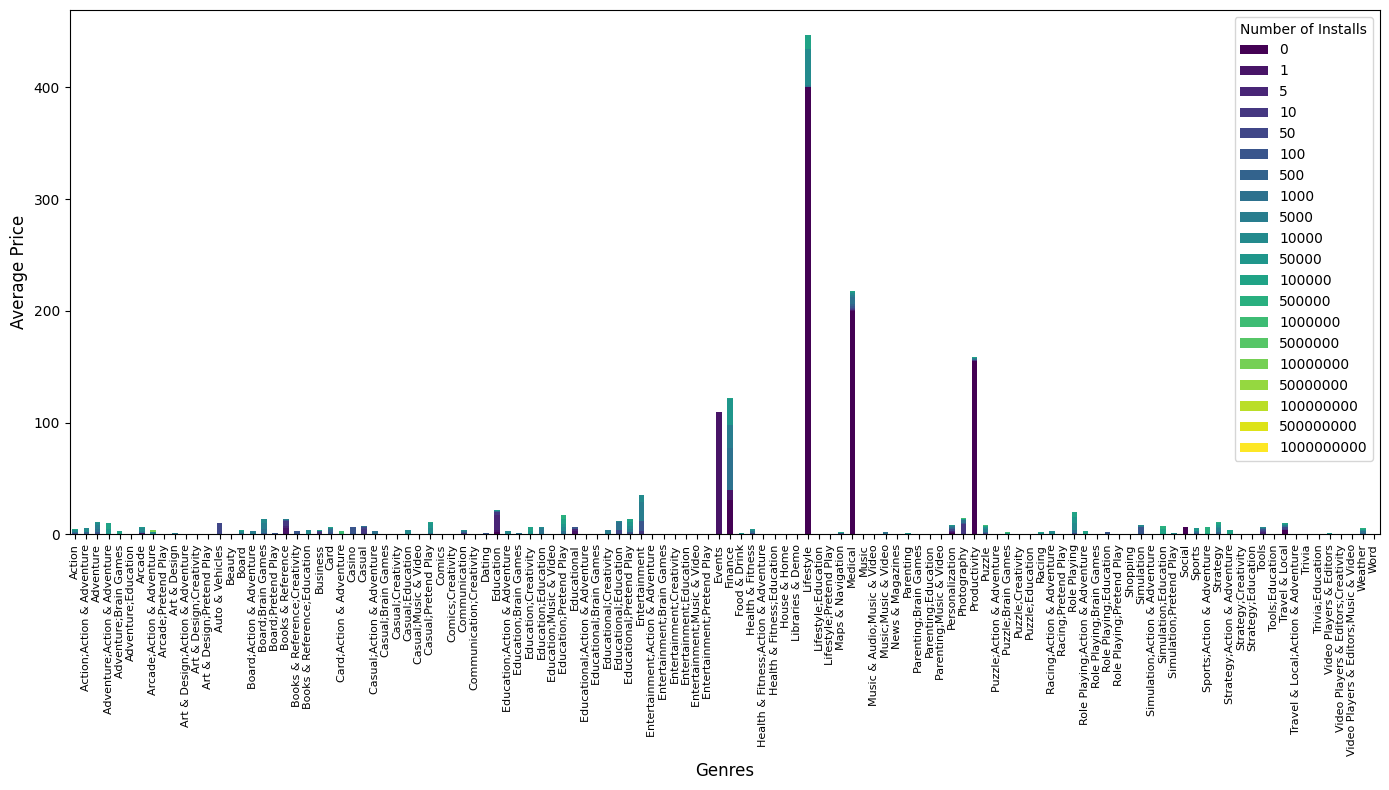

In [81]:
#plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

#add labels
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend(title='Number of Installs', loc='upper right')
plt.xticks(fontsize=8)

#display
plt.tight_layout()
plt.show()

##### 7. How many apps have a rating higher than 4.7, and what is their average price?


In [83]:
hirate=df.loc[df['Rating']>4.7]

In [84]:
rows,_=hirate.shape
print(f"There's {rows} apps with a rating higher than 4.7 and their average price is: ${hirate['Price in dollars'].mean()}")

There's 577 apps with a rating higher than 4.7 and their average price is: $0.4620970537261698


##### 8. What is Google's estimated revenue from apps with 5,000,000+ installs? (Assuming Google takes a 30% cut from app sales)


In [86]:
#locate apps that have more than 5,000,000 
sales=df.loc[df["Installs(+)"]>=5000000]
sales=sales.loc[sales['Type']=='Paid']
# sales2=df.loc[df["Installs"]=='10,000,000+']
# pd.concat([sales,sales2],axis=0)

In [87]:
sales

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (Kb),Price in dollars,Installs(+)
1743,Minecraft,FAMILY,4.5,2376564,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,4.1 and up,21189.138428,6.99,10000000
3206,Hitman Sniper,GAME,4.6,408292,29M,"10,000,000+",Paid,$0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,29696.000000,0.99,10000000


In [88]:
#calculate revenue for each sale.
sales["Google's Revenue per sale"]= sales['Price in dollars'].apply(lambda x: x*0.3)

In [89]:
#calculate revenue for each app.
sales["Google's Revenue per app"]=sales['Installs(+)']*sales["Google's Revenue per sale"]

In [90]:
print(f"Google's estimated revenue from apps with 5,000,000+ installs: {sales["Google's Revenue per app"].sum()}")

Google's estimated revenue from apps with 5,000,000+ installs: 23940000.0


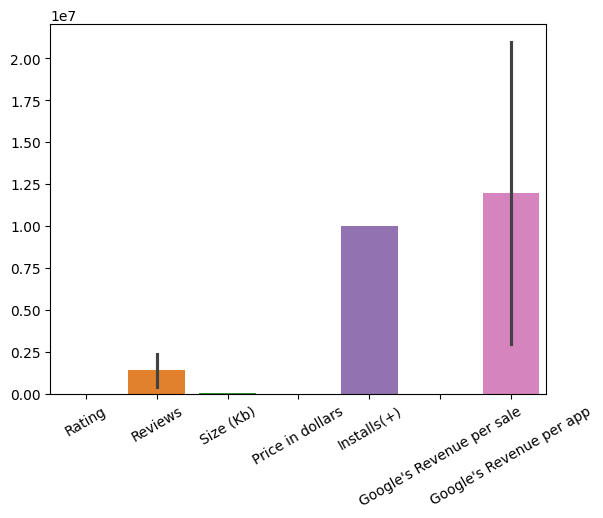

In [91]:
sns.barplot(sales)
plt.xticks(rotation=30)
plt.show()

##### 9. What are the maximum and minimum sizes of free vs. paid apps?


In [93]:
paid=df.loc[df['Type']=='Paid']
free=df.loc[df['Type']=='Free']

In [94]:
smallestfree=free['Size (Kb)'].nsmallest(1)
largestfree=free['Size (Kb)'].nlargest(1)
smallestpaid=paid['Size (Kb)'].nsmallest(1)
largestpaid=paid['Size (Kb)'].nlargest(1)

In [95]:
print("for the given data,")
print(f"minimum size for free apps is: {smallestfree.iloc[0]}, while minimum size for paid apps is: {smallestpaid.iloc[0]}")
print(f"maximum size for free apps is: {largestfree.iloc[0]}, while maximum size for paid apps is: {largestpaid.iloc[0]}")

for the given data,
minimum size for free apps is: 8.5, while minimum size for paid apps is: 14.0
maximum size for free apps is: 102400.0, while maximum size for paid apps is: 102400.0


In [96]:
s = pd.concat([ free.loc[smallestfree.index], free.loc[largestfree.index], paid.loc[smallestpaid.index], paid.loc[largestpaid.index] ], axis=0)

<Axes: xlabel='Type', ylabel='Size (Kb)'>

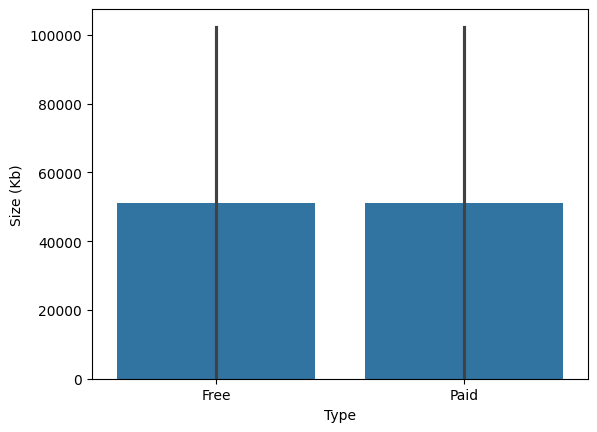

In [97]:
sns.barplot(y='Size (Kb)',x='Type',data=s)

In [98]:
largestfree

869    102400.0
Name: Size (Kb), dtype: float64

In [99]:
df.sort_values('Size (Kb)')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (Kb),Price in dollars,Installs(+)
1244,Essential Resources,LIBRARIES AND DEMO,4.6,237,8.5k,"50,000+",Free,0,Everyone,Libraries & Demo,"September 27, 2017",1.02,7.1 and up,8.5,0.00,50000
1265,Market Update Helper,LIBRARIES AND DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",1.0,1.5 and up,11.0,0.00,1000000
4035,My baby firework (Remove ad),FAMILY,4.1,30,14k,"1,000+",Paid,$0.99,Everyone,Entertainment,"April 25, 2013",1.0,4.1 and up,14.0,0.99,1000
8892,ExDialer PRO Key,COMMUNICATION,4.5,5474,17k,"100,000+",Paid,$3.99,Everyone,Communication,"January 15, 2014",81,2.1 and up,17.0,3.99,100000
4030,Ad Remove Plugin for App2SD,PRODUCTIVITY,4.1,66,17k,"1,000+",Paid,$1.29,Everyone,Productivity,"September 25, 2013",1.0.0,2.2 and up,17.0,1.29,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100M,"10,000+",Free,0,Everyone,Racing,"May 20, 2018",1.03,4.1 and up,102400.0,0.00,10000
4552,The Walking Dead: Our World,GAME,4.0,22435,100M,"1,000,000+",Free,0,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up,102400.0,0.00,1000000
3769,Vi Trainer,HEALTH AND FITNESS,3.6,124,100M,"5,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up,102400.0,0.00,5000
8032,Stickman Legends: Shadow Wars,GAME,4.4,38419,100M,"1,000,000+",Paid,$0.99,Everyone 10+,Action,"August 3, 2018",2.3.24,4.1 and up,102400.0,0.99,1000000


##### 10. Is there a correlation between an app’s rating, number of reviews, size, and its price?


In [101]:
dfcorr=df[['Rating','Reviews','Size (Kb)','Price in dollars']]

In [102]:
dfcorr.corr()

,Rating,Reviews,Size (Kb),Price in dollars
Rating,1.000000,0.046337,0.010404,-0.029405
Reviews,0.046337,1.000000,0.086589,-0.007610
Size (Kb),0.010404,0.086589,1.000000,-0.017226
Price in dollars,-0.029405,-0.007610,-0.017226,1.000000


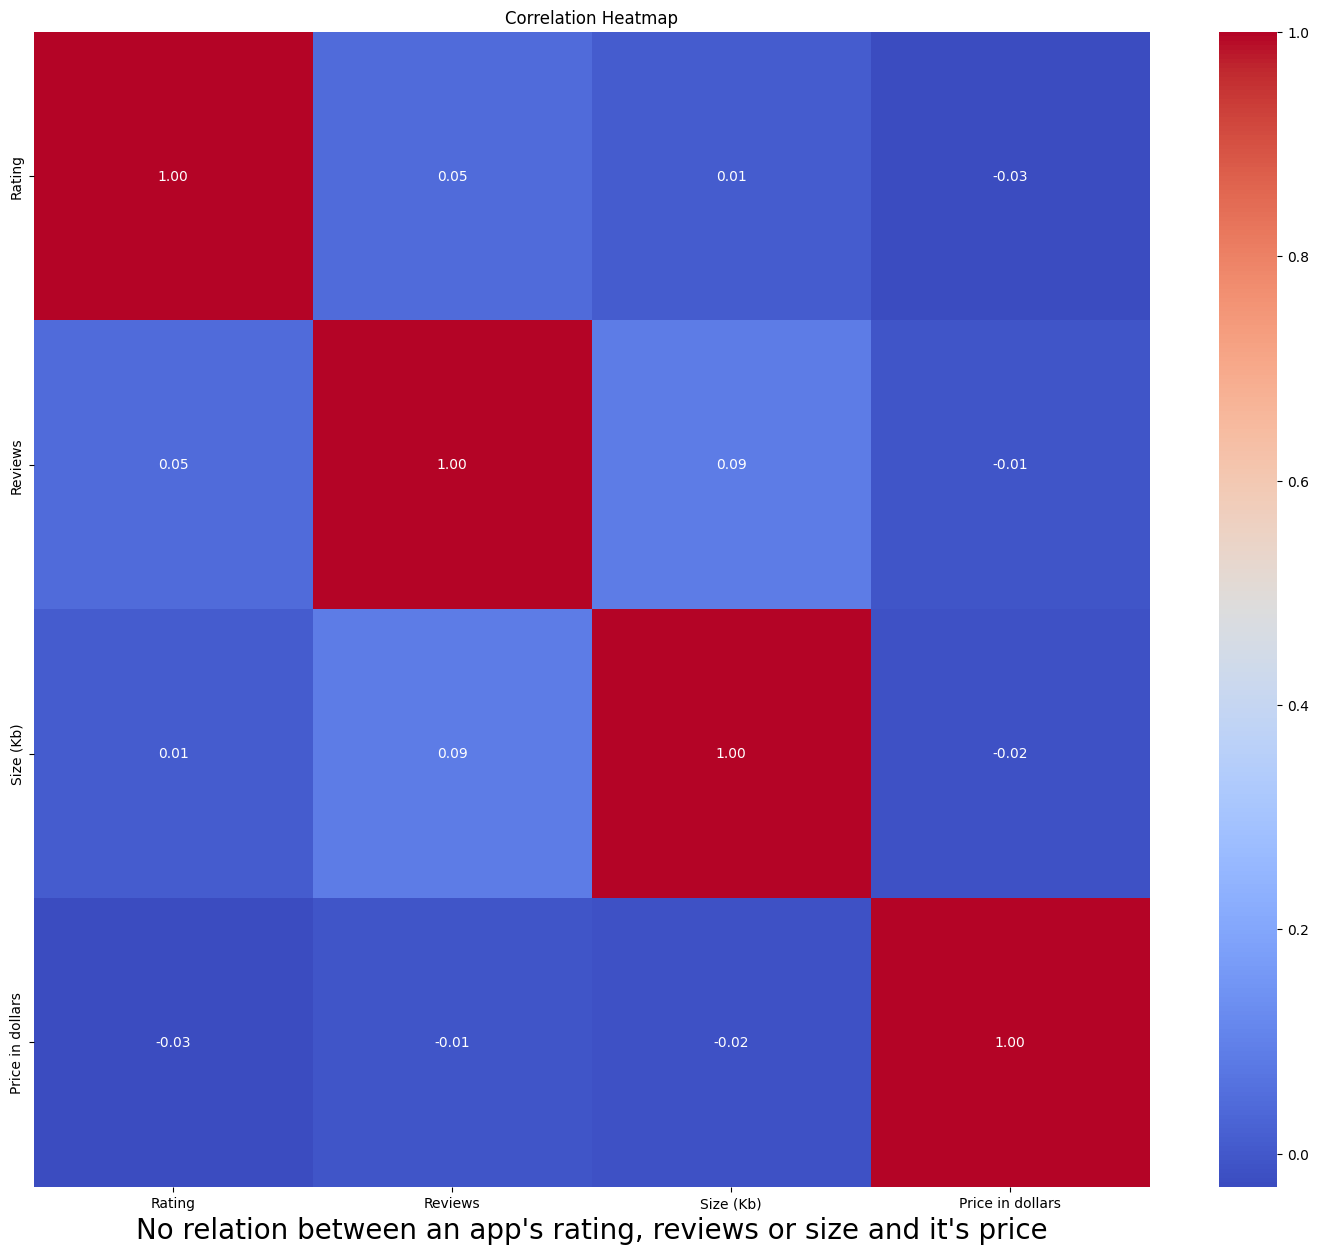

In [103]:
#plot a heatmap for further analysis.
plt.figure(figsize=(18, 15))
sns.heatmap(dfcorr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xlabel("No relation between an app's rating, reviews or size and it's price",fontsize=20)
plt.show()

##### 11. How many apps exist for each type (free/paid) across different content ratings?


In [105]:
app_counts = df.groupby(['Type', 'Content Rating']).size().reset_index(name='Count')

In [106]:
app_counts

,Type,Content Rating,Count
0,Free,Adults only 18+,3
1,Free,Everyone,6822
2,Free,Everyone 10+,285
3,Free,Mature 17+,357
4,Free,Teen,961
5,Free,Unrated,2
6,Paid,Everyone,616
7,Paid,Everyone 10+,31
8,Paid,Mature 17+,18
9,Paid,Teen,52


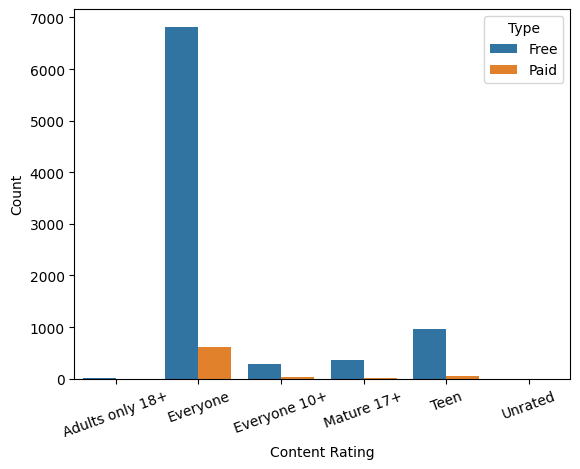

In [107]:
sns.barplot(x='Content Rating',y='Count',hue='Type',data=app_counts)
plt.xticks(rotation=20)
plt.show()

##### 12. How many apps are compatible with Android version 4.x?

In [109]:
Av4=df[df['Android Ver'].str.startswith('4')]
Av4.shape[0]

6936

In [110]:
Av4.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (Kb),Price in dollars,Installs(+)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0,0.0,10000
1,Coloring book moana,ART AND DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0,0.0,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8,0.0,5000000
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",1.0,4.2 and up,25600.0,0.0,50000000
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2867.2,0.0,100000


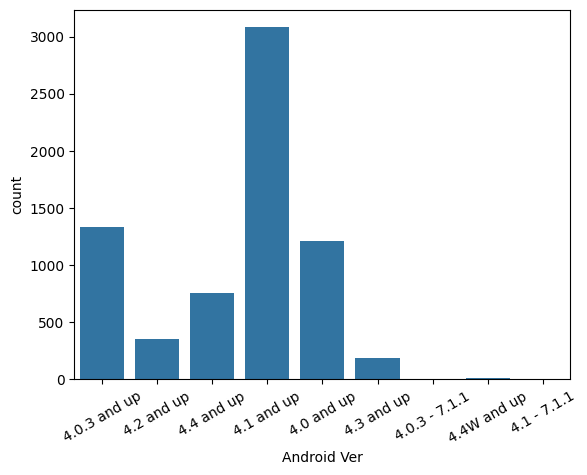

In [111]:
sns.countplot(x='Android Ver',data=Av4)
plt.xticks(rotation=30)
plt.show()